# Inverse quadratic interpolation

Here we look for a root of $x+\cos(10x)$ that is close to 1.

In [1]:
using FundamentalsNumericalComputation

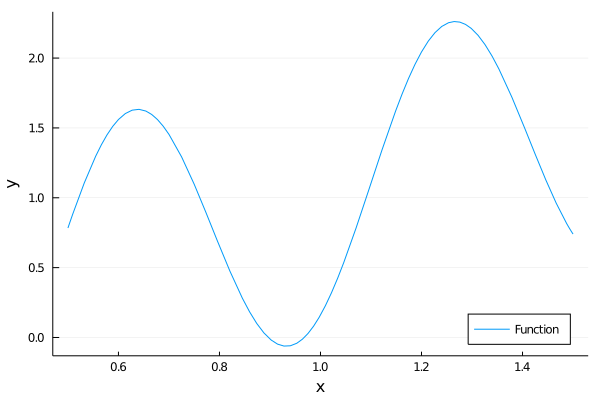

In [2]:
f = x -> x + cos(10*x);
interval = [0.5,1.5];

plot(f,interval...,grid=:y,label="Function",legend=:bottomright,xlabel="x",ylabel="y")

In [3]:
r = nlsolve(x->f(x[1]),[1.]).zero

1-element Vector{Float64}:
 0.9678884021293104

We choose three values to get the iteration started.

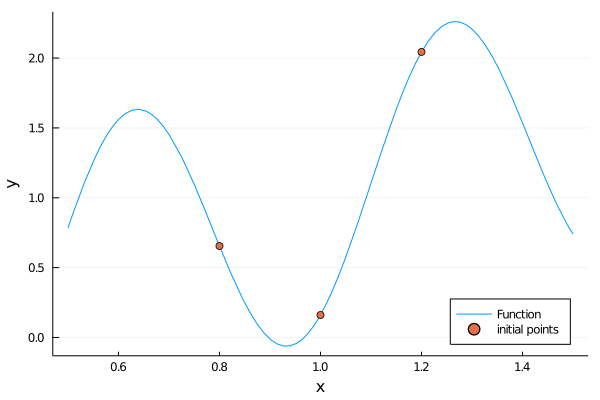

In [4]:
x = [0.8,1.2,1]
y = @. f(x)
scatter!(x,y,label="initial points")

If we were using forward interpolation, we would ask for the polynomial interpolant of $y$ as a function of $x$. But that parabola has no real roots.

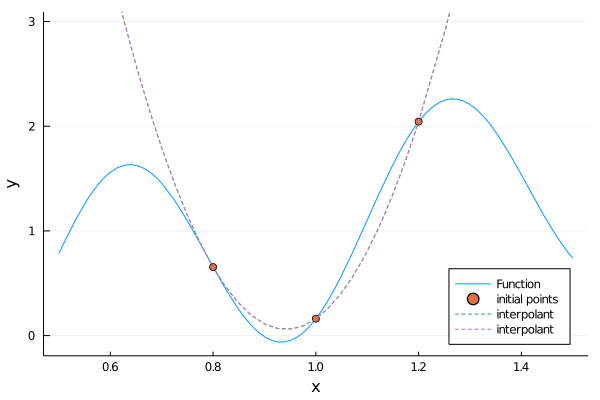

In [7]:
q = fit(x,y,2);      # interpolating polynomial
plot!(x->q(x),interval...,l=:dash,label="interpolant",ylim=[-.1,3])

To do inverse interpolation, we swap the roles of $x$ and $y$ in the interpolation.

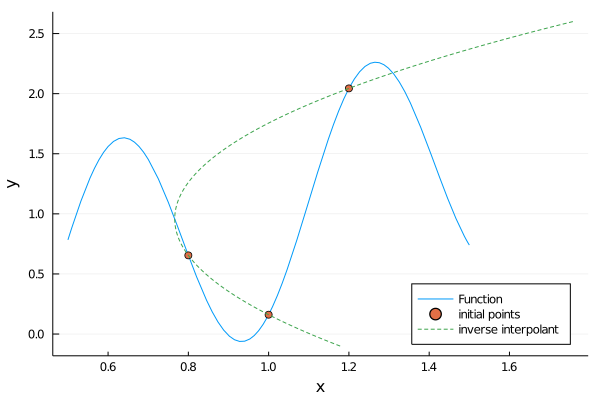

In [8]:
plot(f,interval...,grid=:y,label="Function",legend=:bottomright,xlabel="x",ylabel="y")
scatter!(x,y,label="initial points")

q = fit(y,x,2);      # interpolating polynomial
plot!(y->q(y),y->y,-.1,2.6,l=:dash,label="inverse interpolant")

We seek the value of $x$ that makes $y$ zero. This means evaluating $q$ at zero.

In [9]:
@show x = [x; q(0)];
@show y = [y; f(x[end])];

x = [x; q(0)] = [0.8, 1.2, 1.0, 1.1039813854404716]
y = [y; f(x[end])] = [0.6544999661913865, 2.043853958732492, 0.16092847092354756, 1.1482065231940144]


We repeat the process a few more times.

In [10]:
for k = 4:8
    q = fit(y[k-2:k],x[k-2:k],2)
    x = [x; q(0)]
    y = [y; f(x[k+1])]
end

Here is the sequence of errors.

In [11]:
err = @. x - r

9-element Vector{Float64}:
 -0.16788840212931033
  0.23211159787068958
  0.03211159787068962
  0.13609298331116126
  0.015347343251992718
  0.0032683144541432174
  0.00046174333316018057
  6.2955671520370515e-6
  3.1584923565475265e-9

The error seems to be superlinear, but subquadratic.

In [12]:
logerr = @. log(abs(err));
ratios = @. logerr[2:end] / logerr[1:end-1]

8-element Vector{Float64}:
 0.8184775454303989
 2.3542970942956387
 0.5800188686031718
 2.0942526326509623
 1.370298604275667
 1.3419283705663598
 1.5592295620769054
 1.634412064319916